This notebook was prepared by Cayetano Benavent, 2016.

# Vector analysis with Shapely

In [ ]:
import shapely

Create point data:

In [2]:
pt = Point(5.5, 10.5)

In [3]:
pt.wkt

'POINT (5.5 10.5)'

Computing vector analysis operations:

In [4]:
buff = pt.buffer(10.0)

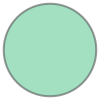

In [5]:
buff

In [6]:
buff.geom_type

'Polygon'

In [7]:
buff.wkt

'POLYGON ((15.5 10.5, 15.45184726672197 9.519828596704395, 15.30785280403231 8.549096779838719, 15.06940335732209 7.597153227455379, 14.73879532511287 6.673165676349106, 14.31921264348355 5.786032631740028, 13.81469612302546 4.944297669803983, 13.23010453362737 4.156067158363551, 12.57106781186548 3.428932188134531, 11.84393284163646 2.769895466372637, 11.05570233019603 2.185303876974553, 10.21396736825999 1.680787356516454, 9.326834323650909 1.261204674887138, 8.402846772544637 0.9305966426779158, 7.450903220161297 0.6921471959676975, 6.480171403295621 0.5481527332780338, 5.500000000000016 0.5, 4.519828596704411 0.5481527332780303, 3.549096779838735 0.6921471959676921, 2.597153227455395 0.9305966426779069, 1.673165676349122 1.261204674887125, 0.786032631740043 1.68078735651644, -0.0557023301960049 2.185303876974537, -0.8439328416364393 2.769895466372618, -1.571067811865462 3.428932188134512, -2.230104533627359 4.156067158363532, -2.814696123025444 4.944297669803964, -3.319212643483542

In [8]:
buff.area

313.6548490545939

In [9]:
pt2 = Point(8.5, 15.5)

In [10]:
buff2 = pt2.buffer(10.0)

In [11]:
buff2.intersects(buff)

True

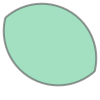

In [12]:
buff2.intersection(buff)

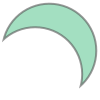

In [13]:
buff2.difference(buff)

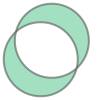

In [14]:
buff2.symmetric_difference(buff)

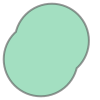

In [15]:
buff2.union(buff)

In [16]:
from shapely.geometry import LineString

In [17]:
line = LineString([(0, 1), (10, 14)])

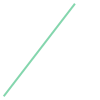

In [18]:
line

In [19]:
line.distance(pt)

1.4328202879967773

In [20]:
ln_buff = line.buffer(5)

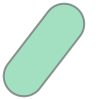

In [21]:
ln_buff